## Python statistics essential training - 05_02_fitmodel

Standard imports

In [17]:
import math

In [18]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib
import matplotlib.pyplot as pp

In [20]:
%matplotlib inline

In [21]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [22]:
gapminder = pd.read_csv('gapminder.csv')

In [23]:
gdata = gapminder.query('year == 1985')

In [24]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

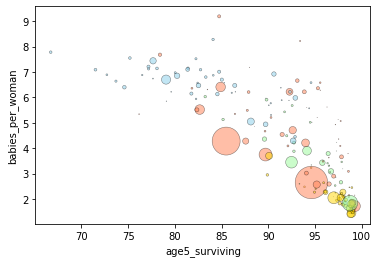

In [25]:
plotdata()

In [40]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [41]:
grandmean = model.fit()

In [42]:
grandmean

In [43]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata),
              c=colors, linewidths=0.5, edgecolor='k', marker='D')

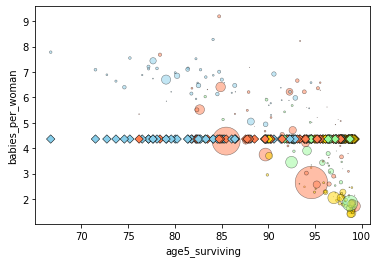

In [44]:
plotfit(grandmean)

In [45]:
grandmean.params

Intercept    4.360714
dtype: float64

In [46]:
grandmeans = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

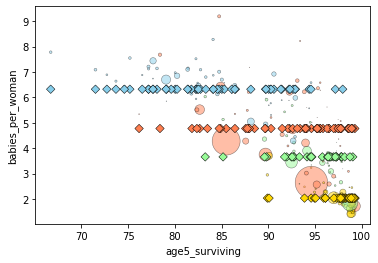

In [47]:
plotfit(grandmeans)

In [48]:
grandmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [49]:
grandmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [50]:
grandmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [51]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [52]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

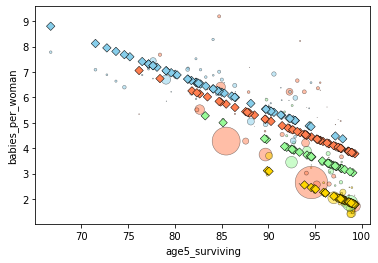

In [53]:
plotfit(surviving)

In [54]:
surviving.params


region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [55]:
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()

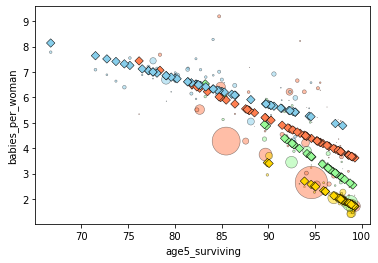

In [56]:
plotfit(surviving_byregion)

In [57]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [60]:
surviving_byregion_pop = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()

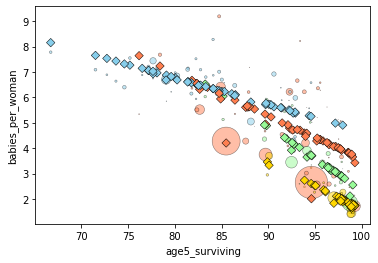

In [61]:
plotfit(surviving_byregion_pop)

In [62]:
surviving_byregion_pop.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64